In [1]:
import matplotlib.patheffects

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
np.random.seed(42)

N = 10_000_000

ID = np.sum(np.random.random(size=(N, 12)), axis=1) - 6

OOD = np.sum(np.random.random(size=(N, 2)), axis=1) - 1
OOD = (1-np.abs(OOD)) * np.sign(OOD) * 6

X = np.random.random(size=N) * 12 - 6

In [3]:
bins = np.array([x*(12/49) - 6 for x in range(49+1)])

X_bins, _ = np.histogram(X, bins=bins)
OOD_bins, _ = np.histogram(OOD, bins=bins)
ID_bins, _ = np.histogram(ID, bins=bins)

In [4]:
c_any = "#000000"
c_id = "#e66101"
c_ood = "#5e3c99"
c_idk = "#b2abd2"

In [5]:
outlined = [
    mpl.patheffects.Stroke(linewidth=5, foreground="white"),
    mpl.patheffects.Normal(),
]

In [6]:
X_scale = 1.0 / np.amax(X_bins)
OOD_scale = (1.0 / np.amax(OOD_bins / X_bins)) / np.amax(X_bins)
ID_scale = (1.0 / np.amax(ID_bins / X_bins)) / np.amax(X_bins)

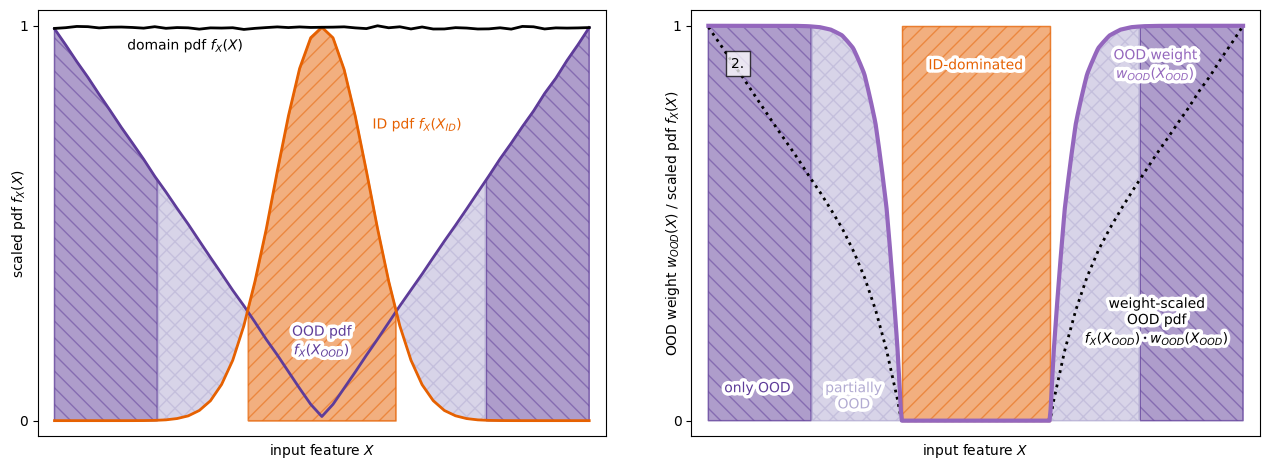

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

""" Subfigure 1 """

ax1.set_xlabel("input feature $X$")
ax1.set_ylabel("scaled pdf $f_{X}(X)$", labelpad=-6.5)

fine_bins = np.linspace(-6+6/49, 6-6/49, 49*10)
fine_id = np.interp(fine_bins, bins[:-1] + 6/49, ID_bins * ID_scale)
fine_ood = np.interp(fine_bins, bins[:-1] + 6/49, OOD_bins * OOD_scale)

ax1.fill_between(
    fine_bins, fine_id, where=(fine_id > fine_ood), color=c_id, alpha=0.5,
)
ax1.fill_between(
    fine_bins, fine_id, where=(fine_id > fine_ood), color='None', edgecolor=c_id, alpha=0.5, hatch="//",
)
ax1.fill_between(
    fine_bins, fine_ood, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color=c_ood, alpha=0.5,
)
ax1.fill_between(
    fine_bins, fine_ood, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color='None', edgecolor=c_ood, alpha=0.5, hatch=r"\\",
)
ax1.fill_between(
    fine_bins, fine_id, fine_ood, where=((fine_ood > fine_id) & (fine_id > 0.001)), color=c_idk, alpha=0.5,
)
ax1.fill_between(
    fine_bins, fine_id, fine_ood, where=((fine_ood > fine_id) & (fine_id > 0.001)), color='None', edgecolor=c_idk, alpha=0.5, hatch="xx",
)

ax1.plot(bins[:-1] + 6/49, OOD_bins * OOD_scale, c=c_ood, lw=2)
ax1.plot(bins[:-1] + 6/49, ID_bins * ID_scale, c=c_id, lw=2)
ax1.plot(bins[:-1] + 6/49, X_bins * X_scale, c=c_any, lw=2)

ax1.text(
    -3.0, 0.95, "domain pdf $f_{X}(X)$", ha='center', va='center', c=c_any, path_effects=outlined,
)
ax1.text(
    0.0, 0.2, "OOD pdf\n$f_{X}(X_{OOD})$", ha='center', va='center', c=c_ood, path_effects=outlined,
)
ax1.text(
    2.1, 0.75, "ID pdf $f_{X}(X_{ID})$", ha='center', va='center', c=c_id, path_effects=outlined,
)

ax1.text(
    0.07, 0.89, "1.", ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'),
)

ax1.set_xlim((-6.25, 6.25))
ax1.set_ylim((-0.04, 1.04))
ax1.set_xticks([], [])
ax1.set_yticks([0.0, 1.0])

""" Subfigure 2 """

ax2.set_xlabel("input feature $X$")
ax2.set_ylabel("OOD weight $w_{OOD}(X)$ / scaled pdf $f_{X}(X)$", labelpad=-6.5)

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

ood_weight = 1.0 - fine_id / np.maximum(fine_id, fine_ood)
fine_ood_weight = np.interp(fine_bins, bins[:-1] + 6/49, OOD_bins/np.amax(OOD_bins))

ax2.fill_between(
    fine_bins, ood_weight, 1.0, where=(fine_id > fine_ood), color=c_id, alpha=0.5,
)
ax2.fill_between(
    fine_bins, ood_weight, 1.0, where=(fine_id > fine_ood), color='None', edgecolor=c_id, alpha=0.5, hatch="//",
)
ax2.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color=c_ood, alpha=0.5,
)
ax2.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color='None', edgecolor=c_ood, alpha=0.5, hatch=r"\\",
)
ax2.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id > 0.001)), color=c_idk, alpha=0.5,
)
ax2.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id > 0.001)), color='None', edgecolor=c_idk, alpha=0.5, hatch="xx",
)

ax2.plot(
    fine_bins, fine_ood_weight * ood_weight, c="black", lw=2, ls=":",
)
ax2.plot(
    fine_bins, ood_weight, c=colours[4], lw=3,
)

ax2.text(
    -4.8, 0.1, "only OOD", ha='center', va='top', c=c_ood, path_effects=outlined,
)
ax2.text(
    -2.68, 0.1, "partially\nOOD", ha='center', va='top', c=c_idk, path_effects=outlined,
)
ax2.text(
    0.0, 0.9, "ID-dominated", ha='center', va='center', c=c_id, path_effects=outlined,
)
ax2.text(
    3.98, 0.25, "weight-scaled\nOOD pdf\n$f_{X}(X_{OOD}) \cdot w_{OOD}(X_{OOD})$",
    ha='center', va='center', c="black", path_effects=outlined,
)
ax2.text(
    3.95, 0.9, "OOD weight\n$w_{OOD}(X_{OOD})$", ha='center', va='center',
    c=colours[4], path_effects=outlined,
)

ax2.text(
    0.07, 0.89, "2.", ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'),
)

ax2.set_xlim((-6.25, 6.25))
ax2.set_ylim((-0.04, 1.04))
ax2.set_xticks([], [])
ax2.set_yticks([0.0, 1.0])

""" Save the figure """

fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0.0)

plt.savefig(
    "../ood-synthesis/figures/weighting/id-ood-weights.pdf",
    dpi=400, transparent=True, bbox_inches='tight',
)

plt.show()